In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Let's take a look at co-occurrences in the Technology sector!

In [2]:
with open('results/technology/Technology_cooccur_dict.pkl', 'rb') as f:
    d = pickle.load(f)

technology = pd.DataFrame(d).fillna(value=0);

In [3]:
technology.head()

,AMBA,ATHM,CRTO,CUDA,DATA,ECOM,EIGI,EPAM,EVTC,FB,...,RXN,SSNI,SSTK,TRMR,TWTR,VEEV,WIX,WUBA,YUME,YY
AAN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
AAOI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,26.0,...,0.0,3.0,0.0,0.0,26.0,0.0,0.0,1.0,0.0,0.0
ABTL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Histograms of number of co-occurrences

No results for ticker AMBA
No results for ticker ATHM


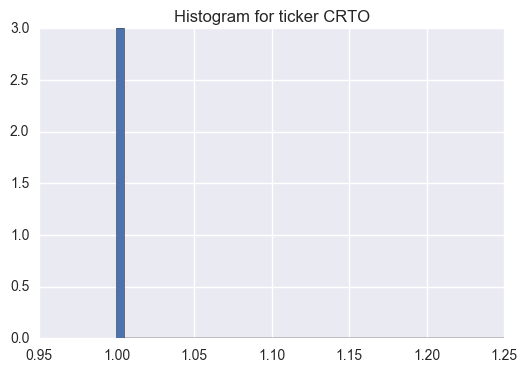

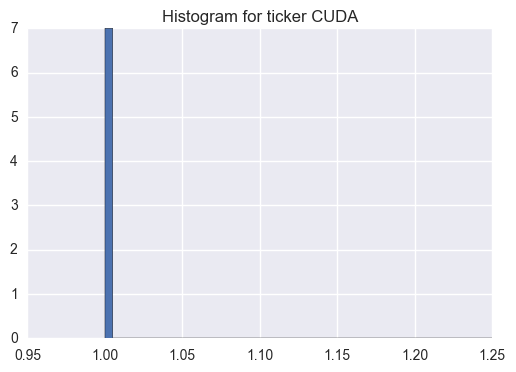

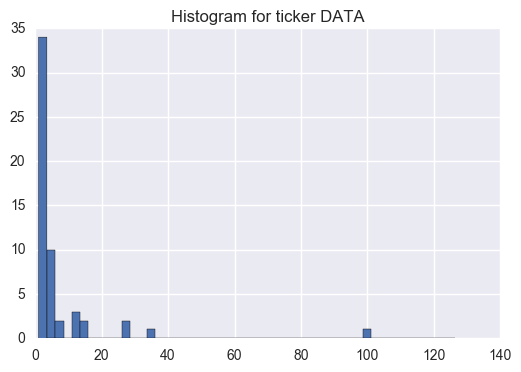

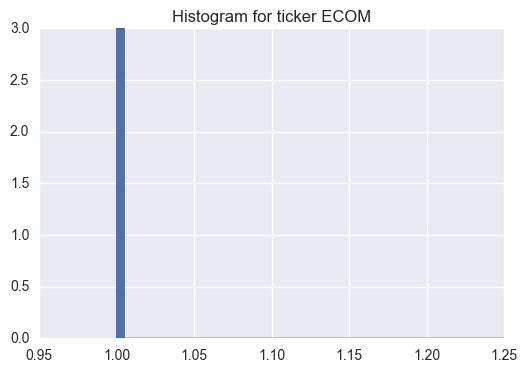

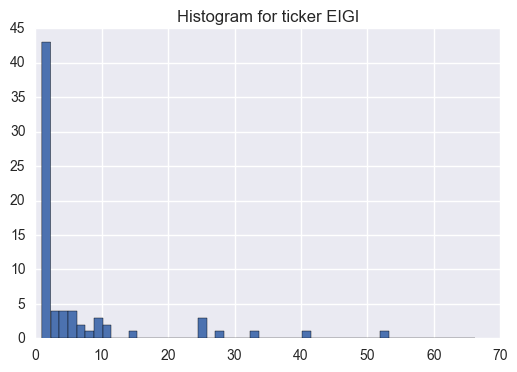

No results for ticker EPAM
No results for ticker EVTC


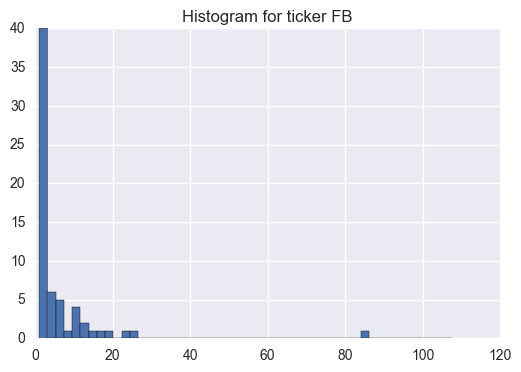

No results for ticker FEYE
No results for ticker GIMO


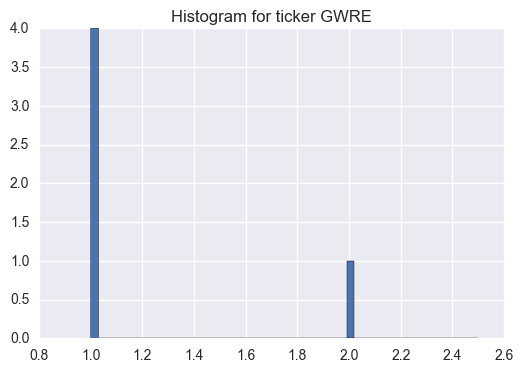

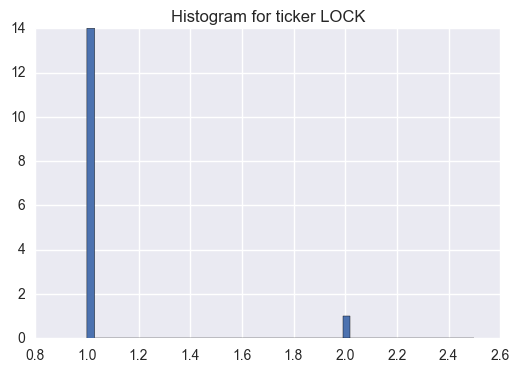

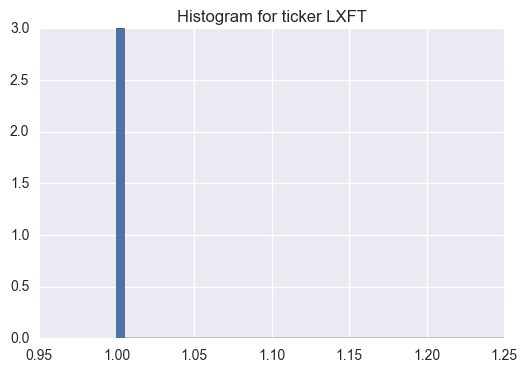

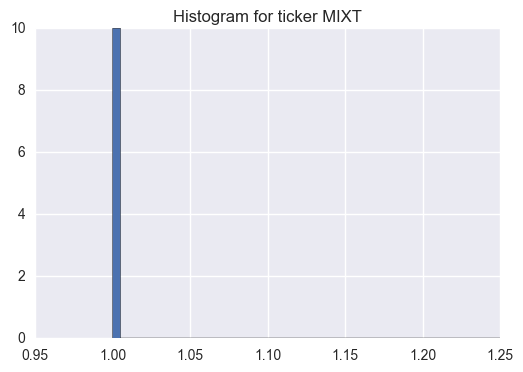

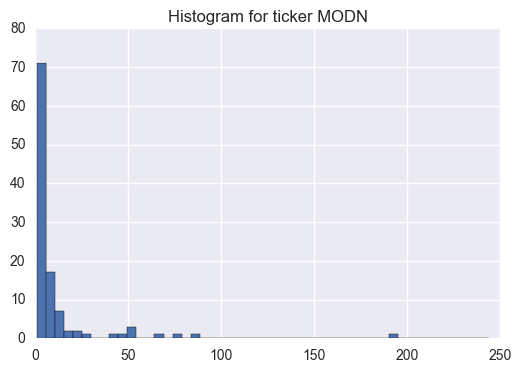

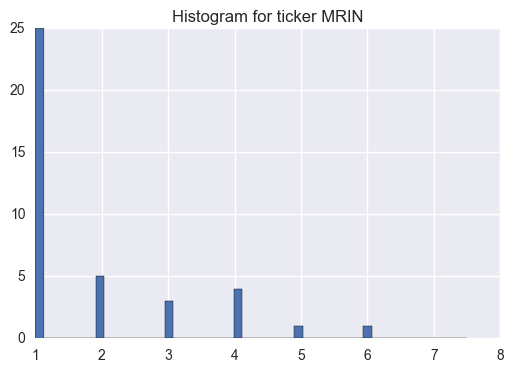

No results for ticker MTSI


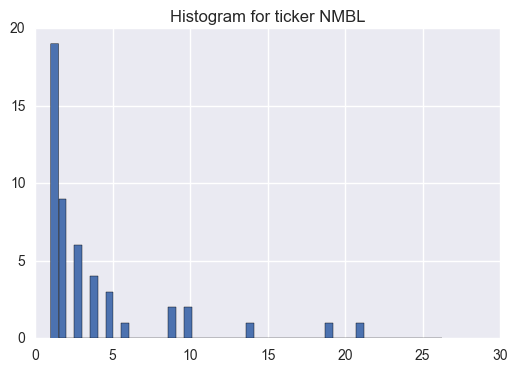

No results for ticker NOW


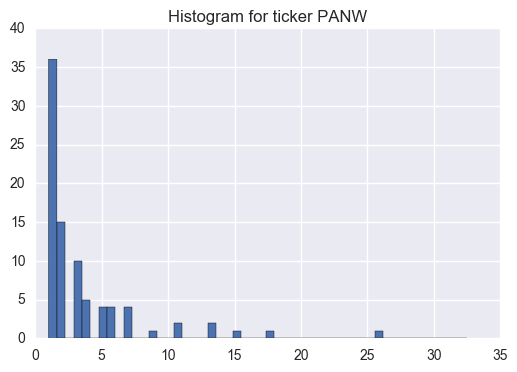

No results for ticker PFPT
No results for ticker QLYS
No results for ticker QUNR


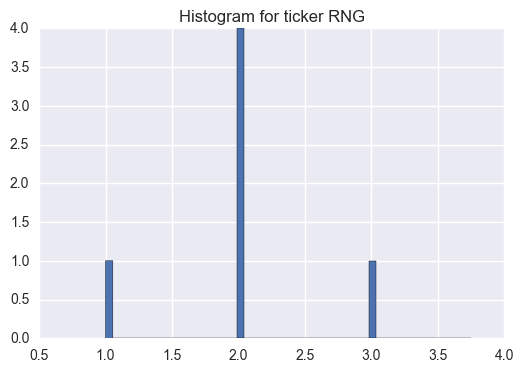

No results for ticker RXN


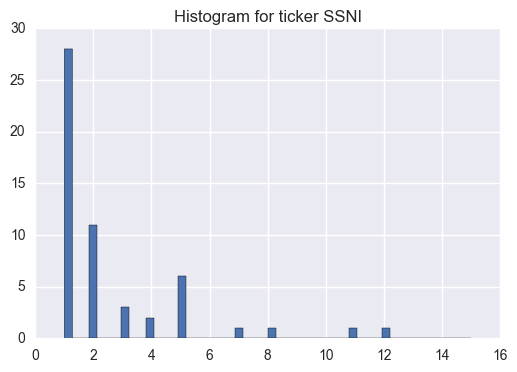

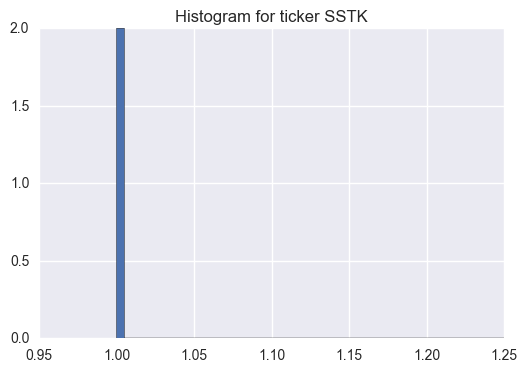

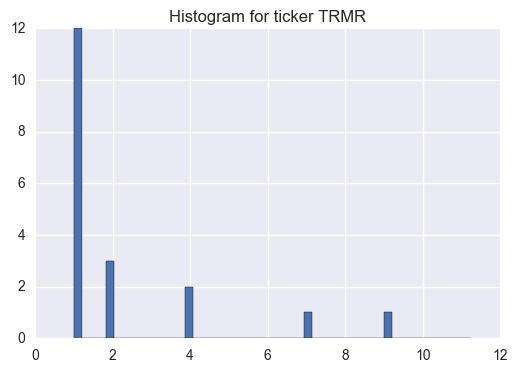

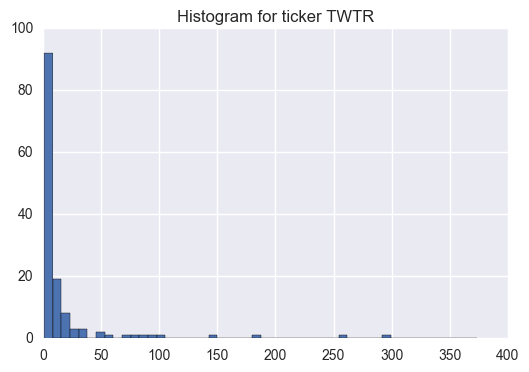

No results for ticker VEEV
No results for ticker WIX


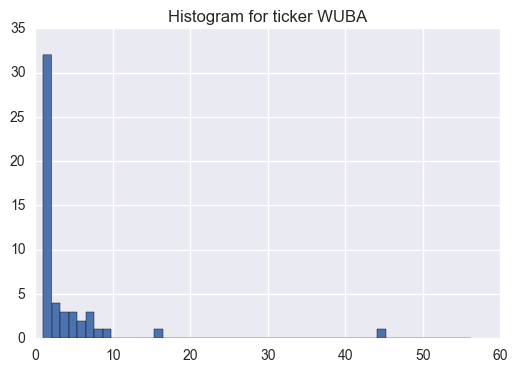

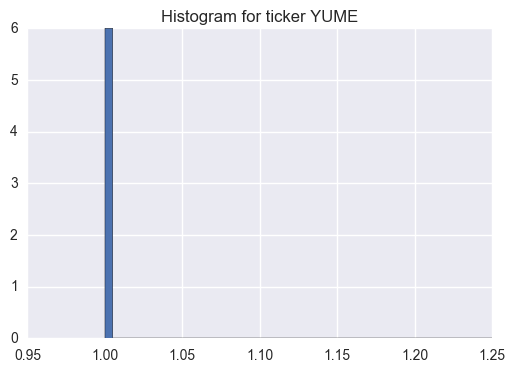

No results for ticker YY


In [16]:
for col in technology.columns.values:
    df_to_plot = technology[col]
    df_to_plot = df_to_plot.drop(col)
    if max(df_to_plot) > 0:
        df_to_plot.hist(bins=50, range=[1, max(df_to_plot)*5/4])
        plt.title('Histogram for ticker '+col)
        plt.show();
    else:
        print 'No results for ticker {}'.format(col)

# Now let's look at the raw totals

In [5]:
for col in technology.columns.values:
    if technology[col].sum()-technology.ix[col, col] > 0:
        print '{} co-occurs with other companies a total of {} times'.format(col, int(technology[col].sum()-technology.ix[col, col]))
    else:
        print '{} does not co-occur with other companies'.format(col)

print '\n \n There are a total of {} co-occurrences within the Technology sector'.format(int(sum([technology[col].sum() for col in technology])-sum([technology.ix[col, col] for col in technology])))

AMBA does not co-occur with other companies
ATHM does not co-occur with other companies
CRTO co-occurs with other companies a total of 3 times
CUDA co-occurs with other companies a total of 7 times
DATA co-occurs with other companies a total of 374 times
ECOM co-occurs with other companies a total of 3 times
EIGI co-occurs with other companies a total of 426 times
EPAM does not co-occur with other companies
EVTC does not co-occur with other companies
FB co-occurs with other companies a total of 377 times
FEYE does not co-occur with other companies
GIMO does not co-occur with other companies
GWRE co-occurs with other companies a total of 6 times
LOCK co-occurs with other companies a total of 16 times
LXFT co-occurs with other companies a total of 3 times
MIXT co-occurs with other companies a total of 10 times
MODN co-occurs with other companies a total of 1120 times
MRIN co-occurs with other companies a total of 71 times
MTSI does not co-occur with other companies
NMBL co-occurs with ot

In [6]:
for col in technology.columns.values:
    if len(technology[technology[col] > 0]-1) > 0:
        # Remember to subtract 1, since the co-occurrence matrix includes co-occurrences with self
        print '{} co-occurs with {} other companies'.format(col, len(technology[technology[col] != 0])-1)
    else:
        print '{} does not co-occur with any other companies'.format(col)
        
print '\n \n There are a total of {} pairs of companies which co-occur within the Technology sector'.format(sum([len(technology[technology[col] != 0])-1 for col in technology.columns.values]))

AMBA does not co-occur with any other companies
ATHM does not co-occur with any other companies
CRTO co-occurs with 3 other companies
CUDA co-occurs with 7 other companies
DATA co-occurs with 55 other companies
ECOM co-occurs with 3 other companies
EIGI co-occurs with 70 other companies
EPAM co-occurs with 0 other companies
EVTC does not co-occur with any other companies
FB co-occurs with 64 other companies
FEYE does not co-occur with any other companies
GIMO does not co-occur with any other companies
GWRE co-occurs with 5 other companies
LOCK co-occurs with 15 other companies
LXFT co-occurs with 3 other companies
MIXT co-occurs with 10 other companies
MODN co-occurs with 109 other companies
MRIN co-occurs with 39 other companies
MTSI does not co-occur with any other companies
NMBL co-occurs with 49 other companies
NOW does not co-occur with any other companies
PANW co-occurs with 86 other companies
PFPT does not co-occur with any other companies
QLYS does not co-occur with any other c

In [7]:
for col in technology.columns.values:
    if len(technology[technology[col]>0]) > 1:
        # We subtract off the co-occurrence with self (technology[col][col]) from total occurrences before dividing by total number of companies with non-zero co-occurrences
        print '{} has an average co-occurrence rate of {} among companies it co-occurs with'.format(col, (technology[col].sum()-technology[col][col])/(len(technology[technology[col] != 0]-1)))
    else:
        print '{} does not co-occur with any other companies'.format(col)

AMBA does not co-occur with any other companies
ATHM does not co-occur with any other companies
CRTO has an average co-occurrence rate of 0.75 among companies it co-occurs with
CUDA has an average co-occurrence rate of 0.875 among companies it co-occurs with
DATA has an average co-occurrence rate of 6.67857142857 among companies it co-occurs with
ECOM has an average co-occurrence rate of 0.75 among companies it co-occurs with
EIGI has an average co-occurrence rate of 6.0 among companies it co-occurs with
EPAM does not co-occur with any other companies
EVTC does not co-occur with any other companies
FB has an average co-occurrence rate of 5.8 among companies it co-occurs with
FEYE does not co-occur with any other companies
GIMO does not co-occur with any other companies
GWRE has an average co-occurrence rate of 1.0 among companies it co-occurs with
LOCK has an average co-occurrence rate of 1.0 among companies it co-occurs with
LXFT has an average co-occurrence rate of 0.75 among compani

### Note: 

- Might want to look at replacing tickers with names for EDA and presentation purposes

In [8]:
print 'Total number of company pairs with non-zero co-occurrences is {}'.format(sum([len(technology[technology[col] != 0]-1) for col in technology.columns.values]))

Total number of company pairs with non-zero co-occurrences is 817


### Features to consider using or engineering:

- Average co-occurrence rate
- Number of companies it co-occurs with
- Industry
- Co-occurrence count with self (as baseline for popularity)

# On to Finance sector co-occurrences!

In [9]:
with open('results/finance/Finance_cooccur_dict.pkl', 'rb') as f:
    d = pickle.load(f)

finance = pd.DataFrame(d).fillna(value=0);

In [10]:
finance = finance.drop('MMI', axis=1)

In [11]:
finance.head()

,AHH,APAM,BCRH,CG,ESNT,EVER,FGL,HAWK,NBHC,NSM,OAK,OMF,RLGY,RMAX,SGM,TPRE,VOYA
AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABTX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Let's look at raw totals

In [12]:
for col in finance.columns.values:
    if finance[col].sum()-finance.ix[col, col] > 0:
        print '{} co-occurs with other companies a total of {} times'.format(col, int(finance[col].sum()-finance.ix[col, col]))
    else:
        print '{} does not co-occur with other companies'.format(col)

print '\n \n There are a total of {} co-occurrences within the Finance sector'.format(int(sum([finance[col].sum() for col in finance])-sum([finance.ix[col, col] for col in finance])))

AHH does not co-occur with other companies
APAM co-occurs with other companies a total of 8 times
BCRH does not co-occur with other companies
CG co-occurs with other companies a total of 1714 times
ESNT does not co-occur with other companies
EVER co-occurs with other companies a total of 3 times
FGL does not co-occur with other companies
HAWK does not co-occur with other companies
NBHC co-occurs with other companies a total of 281 times
NSM does not co-occur with other companies
OAK co-occurs with other companies a total of 341 times
OMF co-occurs with other companies a total of 10 times
RLGY co-occurs with other companies a total of 75 times
RMAX co-occurs with other companies a total of 506 times
SGM does not co-occur with other companies
TPRE co-occurs with other companies a total of 161 times
VOYA does not co-occur with other companies

 
 There are a total of 3099 co-occurrences within the Finance sector


In [13]:
for col in finance.columns.values:
    if len(finance[finance[col] > 0]-1) > 0:
        # Remember to subtract 1, since the co-occurrence matrix includes co-occurrences with self
        print '{} co-occurs with {} other companies'.format(col, len(finance[finance[col] != 0])-1)
    else:
        print '{} does not co-occur with any other companies'.format(col)
        
print '\n \n There are a total of {} pairs of companies which co-occur within the Finance sector'.format(sum([len(finance[finance[col] != 0])-1 for col in finance.columns.values]))

AHH does not co-occur with any other companies
APAM co-occurs with 8 other companies
BCRH does not co-occur with any other companies
CG co-occurs with 117 other companies
ESNT does not co-occur with any other companies
EVER co-occurs with 3 other companies
FGL does not co-occur with any other companies
HAWK does not co-occur with any other companies
NBHC co-occurs with 94 other companies
NSM does not co-occur with any other companies
OAK co-occurs with 71 other companies
OMF co-occurs with 10 other companies
RLGY co-occurs with 22 other companies
RMAX co-occurs with 77 other companies
SGM does not co-occur with any other companies
TPRE co-occurs with 46 other companies
VOYA co-occurs with 0 other companies

 
 There are a total of 441 pairs of companies which co-occur within the Finance sector


# Now let's take a look at covariance and correlation in the Finance sector

In [2]:
with open('results/technology/raw_stock_data.pkl', 'rb') as f:
    d = pickle.load(f)

In [3]:
d['ORCL']

[{'Adj_Close': '38.30',
  'Close': '38.450001',
  'Date': '2016-12-30',
  'High': '38.860001',
  'Low': '38.34',
  'Open': '38.75',
  'Symbol': 'ORCL',
  'Volume': '10820200'},
 {'Adj_Close': '38.539062',
  'Close': '38.689999',
  'Date': '2016-12-29',
  'High': '38.84',
  'Low': '38.610001',
  'Open': '38.610001',
  'Symbol': 'ORCL',
  'Volume': '5711800'},
 {'Adj_Close': '38.529103',
  'Close': '38.68',
  'Date': '2016-12-28',
  'High': '38.919998',
  'Low': '38.630001',
  'Open': '38.869999',
  'Symbol': 'ORCL',
  'Volume': '8264100'},
 {'Adj_Close': '38.668556',
  'Close': '38.82',
  'Date': '2016-12-27',
  'High': '39.040001',
  'Low': '38.759998',
  'Open': '38.77',
  'Symbol': 'ORCL',
  'Volume': '5073700'},
 {'Adj_Close': '38.628711',
  'Close': '38.779999',
  'Date': '2016-12-23',
  'High': '39.02',
  'Low': '38.630001',
  'Open': '38.790001',
  'Symbol': 'ORCL',
  'Volume': '8143600'},
 {'Adj_Close': '38.808009',
  'Close': '38.959999',
  'Date': '2016-12-22',
  'High': '39.2

In [7]:
with open('results/technology/corr.pkl', 'rb') as f:
    d = pickle.load(f)

correlations = pd.DataFrame(d);

In [8]:
correlations.head()

,AAOI,AMBA,ATHM,BCOV,BNFT,BV,COMM,COVS,CRTO,CUDA,...,SSTK,SYNC,TRMR,TWTR,VEEV,WDAY,WIX,WUBA,YUME,YY
AAN,0.336510,0.396675,0.374351,-0.118784,0.092716,0.322222,0.231693,0.140214,0.365781,0.497525,...,0.099876,-0.235631,0.350180,0.269879,-0.240605,0.089220,-0.163533,0.105834,0.205109,0.173658
AAOI,1.000000,-0.008633,0.005456,0.215419,0.181790,0.084248,0.195857,0.251964,-0.066402,-0.017410,...,0.114474,0.077534,0.308811,0.001995,0.084707,0.093865,0.282559,-0.084824,0.064404,0.163350
AAPL,0.246848,-0.425398,0.082914,0.380972,0.556289,0.358727,-0.410911,0.837194,-0.102177,0.270179,...,0.464215,0.188317,0.767695,0.461509,-0.141522,0.251095,-0.064105,-0.256813,0.659752,0.187076
ABTL,0.149132,0.319287,-0.367139,-0.007887,0.244639,-0.640614,0.261123,-0.180081,0.241017,-0.411228,...,-0.608912,-0.214755,-0.300072,-0.458543,0.054130,-0.238584,0.234493,0.437395,-0.511071,-0.400803
ACIW,0.328558,-0.436218,0.108920,0.430508,0.662195,0.423098,-0.460780,0.875936,-0.075846,0.306492,...,0.530770,0.185226,0.880809,0.500903,-0.186110,0.315173,-0.114364,-0.175555,0.698801,0.269354
